# Monte Carlo and Root Finding

**CS1302 Introduction to Computer Programming**
___

## The Monty-Hall Game

In [3]:
%%html
<iframe width="912" height="513" src="https://www.youtube.com/embed/rn1y-HrmA5c?end=23" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

**Is it better to change the initial pick? What is the chance of winning if we change?**

*Hint:* There are two doors to choose from, and only one of the doors has treasure behind.

Let's use the following program to play the game a couple of times.

In [6]:
import random


def play_monty_hall(num_of_doors=3):
    '''Main function to run the Monty Hall game.'''
    doors = {str(i) for i in range(num_of_doors)}
    door_with_treasure = random.sample(doors, 1)[0]

    # Input initial pick of the door.
    while True:
        initial_pick = input(f'Pick a door from {", ".join(sorted(doors))}: ')
        if initial_pick in doors: break

    # Open all but one other door. Opened door must have nothing.
    doors_to_open = doors - {initial_pick, door_with_treasure}
    other_door = door_with_treasure if initial_pick != door_with_treasure \
                                    else doors_to_open.pop()
    print('Door(s) with nothing behind:', *doors_to_open)

    # Allow player to change the initial pick the other (unopened) door.
    change_pick = input(
        f'Would you like to change your choice to {other_door}? [y/N] ').lower(
        ) == 'y'

    # Check and recording winning.
    if not change_pick:
        mh_stats['# no change'] += 1
        if door_with_treasure == initial_pick:
            mh_stats['# win without changing'] += 1
            return print('You won!')
    else:
        mh_stats['# change'] += 1
        if door_with_treasure == other_door:
            mh_stats['# win by changing'] += 1
            return print('You won!')
    print(f'You lost. The door with treasure is {door_with_treasure}.')

       
mh_stats = dict.fromkeys(('# win by changing',
                          '# win without changing',
                          '# change',
                          '# no change'),0)

def monty_hall_statistics():
    '''Print the statistics of the Monty Hall games.'''
    print('-' * 30, 'Statistics', '-' * 30)
    if mh_stats['# change']:
        print(f"% win by changing: \
        {mh_stats['# win by changing'] / mh_stats['# change']:.0%}")
    if mh_stats['# no change']:
        print(f"% win without changing: \
        {mh_stats['# win without changing']/mh_stats['# no change']:.0%}")

In [34]:
play_monty_hall()
monty_hall_statistics()

KeyboardInterrupt: 

You may also [play the game online](https://math.ucsd.edu/~crypto/Monty/monty.html).

To get a good estimate of the chance of winning, we need to play the game many times.  
We can write a Monty-Carlo simulation instead.

In [7]:
# Do not change any variables defined here, or some of the tests may fail.
import numpy as np
np.random.randint?

np.random.seed(0)  # for reproducible result
num_of_games = int(10e7)
door_with_treasure = np.random.randint(1, 4, num_of_games, dtype=np.uint8)
initial_pick = np.random.randint(1, 4, num_of_games, dtype=np.uint8)

print(f"{'Door with treasure:':>19}", *door_with_treasure[:10],'...')
print(f"{'Initial pick:':>19}", *initial_pick[:10],'...')

Door with treasure: 1 3 1 3 1 2 3 3 1 1 ...
      Initial pick: 1 2 1 2 1 1 1 1 2 2 ...


- `door_with_treasure` stores as 8-bit unsigned integers `uint8` the door numbers randomly chosen from $\{1, 2, 3\}$ as the doors with treasure behind for a number `num_of_games` of Monty-Hall games.
- `initial_pick` stores the initial choices for the different games.

If players do not change their initial pick, the chance of winning can be estimated as follows:

In [8]:
def estimate_chance_of_winning_without_change(door_with_treasure,
                                              initial_pick):
    '''Estimate the chance of winning the Monty Hall game without changing 
    the initial pick using the Monte Carlo simulation of door_with_treasure 
    and initial_pick.'''
    count_of_win = 0
    for x, y in zip(door_with_treasure, initial_pick):
        if x == y: count_of_win += 1
    return count_of_win / n


n = num_of_games // 100
estimate_chance_of_winning_without_change(door_with_treasure[:n],
                                          initial_pick[:n])

0.333291

However, the above code is inefficient and takes a long time to run. You may try running it on the entire sequences of `door_with_treasure` and `initial_pick` but **DO NOT** put the code in your notebook, as jupyterhub refuses to autograde notebook that take too much time or memory to run.

A simpler and also more efficient solution with well over 100 times speed up is as follows:

In [9]:
def estimate_chance_of_winning_without_change(door_with_treasure,
                                              initial_pick):
    '''Estimate the chance of winning the Monty Hall game without changing 
    the initial pick using the Monte Carlo simulation of door_with_treasure 
    and initial_pick.'''
    return (door_with_treasure == initial_pick).mean()

estimate_chance_of_winning_without_change(door_with_treasure,
                                          initial_pick)

0.33332177

The code uses the method `mean` of `ndarray` that computes the mean of the `numpy` array.  
In computing the mean, `True` and `False` are regarded as `1` and `0` respectively, as illustrated below.

In [39]:
for i in True, False:
    for j in True, False:
        print(f'{i} + {j} == {i + j}')

True + True == 2
True + False == 1
False + True == 1
False + False == 0


**Exercise** Define the function `estimate_chance_of_winning_by_change` same as `estimate_chance_of_winning_without_change` above but returns the estimate of the chance of winning by changing the initial choice instead. Again, *implement efficiently or jupyterhub may refuse to autograde your entire notebook*.

*Hint:* Since there are only two unopened doors at the end of each game, a player will win by changing the initial pick if the initially picked door is not the door with treasure behind.

In [10]:
def estimate_chance_of_winning_by_change(door_with_treasure,
                                              initial_pick):
    '''Estimate the chance of winning the Monty Hall game by changing 
    the initial pick using the Monte Carlo simulation of door_with_treasure 
    and initial_pick.'''
    ### BEGIN SOLUTION
    return (door_with_treasure != initial_pick).mean()
    ### END SOLUTION

In [11]:
# tests
assert np.isclose(
    estimate_chance_of_winning_by_change(door_with_treasure[:10],
                                         initial_pick[:10]), 0.7)
### BEGIN HIDDEN TESTS
assert np.isclose(
    estimate_chance_of_winning_by_change(door_with_treasure[10:],
                                         initial_pick[10:]),
    0.6666782266678226)
### END HIDDEN TESTS

## Solving a 3-by-3 system of linear equations

`numpy` has a module `linalg` for linear algebra, and the module provides a function called `solve` that can solve a system of linear equations. For the example in the lecture

$$
\begin{aligned}
2 x_0 + 2 x_1 &= 1\\
2 x_1 &= 1,
\end{aligned}
$$
we can obtain the solution as follows:

In [10]:
np.linalg.solve?
A = np.array([[2.,2],[0,2]])
b = np.array([1.,1])
x = np.linalg.solve(A,b)

As explained in the lecture, the arguments `A` and `b` are obtained from the matrix form of the system of linear equations:

$$
\underbrace{
\begin{bmatrix}
2 & 2\\
0 & 2
\end{bmatrix}}_{\mathbf{A}}
\underbrace{
\begin{bmatrix}
x_0\\ x_1
\end{bmatrix}}_{\mathbf{x}}
= 
\underbrace{
\begin{bmatrix}
1 \\ 1
\end{bmatrix}
}_{\mathbf{b}}
$$

However, the function returns an error when there is no unique solutions. 

In [22]:
# Case with infinitely many solution
A = np.array([[2.,2],[2,2]])
b = np.array([1.,1])
x = np.linalg.solve(A,b)

LinAlgError: Singular matrix

In [23]:
# Case without solution
A = np.array([[2.,2],[2,2]])
b = np.array([1.,0])
x = np.linalg.solve(A,b)

LinAlgError: Singular matrix

A unique solution does not exist if and only if the [determinant](https://en.m.wikipedia.org/wiki/Determinant) of $\mathbf{A}$ is $0$, in which case $\mathbf{A}$ is called a singular matrix. For a $2$-by-$2$ matrix, the determinant is defined as follows:

$$ 
\begin{aligned}
\operatorname{det}(A) &:= \left| 
\begin{matrix}
a_{00} & a_{01}\\
a_{10} & a_{11}
\end{matrix}
\right|\\
&= a_{00}\times a_{11} - a_{01}\times a_{10}.
\end{aligned}
$$

For example, the first system has a unique solution because

$$
\left|
\begin{matrix}
2 & 2\\
0 & 2
\end{matrix}
\right|
= 2\times 2 - 2\times 0 = 4>0.
$$
The last two systems do not have unique solutions because

$$
\left|
\begin{matrix}
2 & 2\\
2 & 2
\end{matrix}
\right|
= 2\times 2 - 2\times 2 = 0.
$$
We can use the function `det` from `np.linalg` to compute the determinant as follows:

In [24]:
np.linalg.det?
np.linalg.det(np.array([[2.,2],[0,2]])), np.linalg.det(np.array([[2.,2],[2,2]]))

(4.0, 0.0)

**Exercise** Use the `det` and `solve` functions to assign `x` to the `numpy` array storing the solution of the following linear system if the solution is unique else `None`.

$$
\begin{aligned}
x_0 + 2 x_1 + 3x_2 &= 14\\
2x_0 + x_1 + 2x_2 &= 10\\
3 x_0 + 2x_1 + x_2 &= 10.
\end{aligned}
$$

In [14]:
### BEGIN SOLUTION
A = np.array([[1.,2,3],[2,1,2],[3,2,1]])
b = np.array([14.,10,10])
x = np.linalg.solve(A,b)
### END SOLUTION
x

array([1., 2., 3.])

In [15]:
# tests
# As the main test must be hidden, you may want to verify your solution
# as explained in the lecture using matrix multiplication.
assert isinstance(x,np.ndarray) and x.shape == (3,)
### BEGIN HIDDEN TESTS
assert np.isclose(x,np.array([1,2,3])).all()
### END HIDDEN TESTS

## Solving non-linear equations

Suppose we want to solve:

$$
f(x) = 0
$$
for some possibly non-linear real-valued function $f(x)$ in one real-valued variable $x$. Quadratic equation with an $x^2$ term is an example. The following is another example.

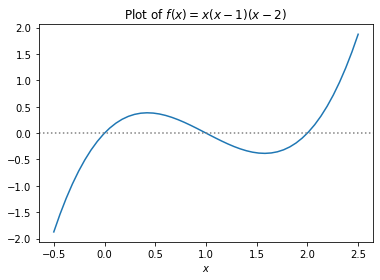

In [16]:
import matplotlib.pyplot as plt
import numpy as np

f = lambda x: x*(x - 1)*(x - 2)
x = np.linspace(-0.5,2.5)
plt.plot(x,f(x))
plt.axhline(color='gray',linestyle=':')
plt.xlabel(r'$x$')
plt.title(r'Plot of $f(x)=x(x-1)(x-2)$')
plt.show()

While it is clear that the above function has three roots, namely, $x=0, 1, 2$, can we write a program to compute a root of any given continuous function $f$?

In [17]:
%%html
<iframe width="912" height="513" src="https://www.youtube.com/embed/PXSLcEGkXkU" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

The following function `bisection` 
- takes as arguments 
  - a continuous function `f`,
  - two real values `a` and `b`, 
  - a positive integer `n` indicating the maximum depth of the recursion, and
- returns a list `[xstart, xstop]` if the bisection succeeds in capturing a root in the interval `[xstart, xstop]` bounded by `a` and `b`, or else, returns a empty list `[]`.

In [18]:
def bisection(f,a,b,n=10):
    if f(a) * f(b) > 0:
        return []  # because f(x) may not have a root between x=a and x=b
    elif n <= 0:   # base case when recursion cannot go any deeper
        return [a,b] if a <= b else [b,a]
    else:
        c = (a + b)/2  # bisect the interval between a and b
        return bisection(f,a,c,n-1) or bisection(f,c,b,n-1)  # recursion
    
# bisection solver
import ipywidgets as widgets
@widgets.interact(a=(-0.5,2.5,0.5),b=(-0.5,2.5,0.5),n=(0,10,1))
def bisection_solver(a=-0.5,b=0.5,n=0):
    x = np.linspace(-0.5,2.5)
    plt.plot(x,f(x))
    plt.axhline(color='gray',linestyle=':')
    plt.xlabel(r'$x$')
    plt.title(r'Bisection on $f(x)$')
    [xstart,xstop] = bisection(f,a,b,n)
    plt.plot([xstart,xstop],[0,0],'r|-')
    print('Interval: ',[xstart,xstop])

interactive(children=(FloatSlider(value=-0.5, description='a', max=2.5, min=-0.5, step=0.5), FloatSlider(value…

Try setting the values of $a$ and $b$ as follows and change $n$ to see the change of the interval step-by-step.

In [19]:
bisection(f,-0.5,0.5), bisection(f,1.5,0.5), bisection(f,-0.1,2.5)

([-0.0009765625, 0.0], [1.0, 1.0009765625], [1.9998046875000002, 2.00234375])

**Exercise** Modify the function `bisection` to 
- take the floating point parameter `tol` instead of `n`, and
- return the interval from the bisection method represented by a list `[xstart,xstop]` but as soon as the gap `xstop - xstart` is $\leq$ `tol`.

In [20]:
def bisection(f,a,b,tol=1e-9):
    ### BEGIN SOLUTION
    if f(a) * f(b) > 0:
        return []
    elif abs(b - a) <= tol:
        return [a,b] if a <= b else [b,a]
    else:
        c = (a + b)/2
        return bisection(f,a,c,tol) or bisection(f,c,b,tol)
    ### END SOLUTION

In [21]:
# tests
import numpy as np
f = lambda x: x*(x - 1)*(x - 2)
bisection(f,1.5,0.5)
assert np.isclose(bisection(f,-0.5,0.5),[-9.313225746154785e-10, 0.0]).all()
assert np.isclose(bisection(f,1.5,0.5,1e-2), [1.0, 1.0078125]).all()
assert np.isclose(bisection(f,-0.1,2.5,1e-3), [1.9998046875000002, 2.0004394531250003]).all()
### BEGIN HIDDEN TESTS
f = lambda x: np.sin(x)
assert np.isclose(bisection(f,-0.5,0.5,tol=1e-3), [-0.0009765625, 0.0]).all()
assert np.isclose(bisection(f,3,4,tol=1e-4), [3.14154052734375, 3.1416015625]).all()
assert np.isclose(bisection(f,6,7,tol=1e-5), [6.283180236816406, 6.2831878662109375]).all()
### END HIDDEN TESTS